# Getting Started

In [1]:
%matplotlib inline

import scipy.stats
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size

change_plot_size(20, 6, plt)

# Generate an Idealized Bidirectional Arc Curve

This generates a vector of a matrix profile indices that randomly point to different parts of the time series. 

In [3]:
k = 5000

mpi = np.random.randint(0, k, size=k)
AC = np.zeros(k, dtype=np.int64)
nnmark = np.zeros(k, dtype=np.int64)

for i in range(k):
    j = mpi[i]
    nnmark[min(i, j)] = nnmark[min(i, j)] + 1
    nnmark[max(i, j)] = nnmark[max(i, j)] - 1

AC = np.cumsum(nnmark)

# Fit a Beta Distribution to the Idealized Bidirectional Arc Curve

Average the computed alpha and beta parameters across 1,000 iterations and by drawing 1,000 samples from a distribution that is sampled according to the unnormalized histogram.

1.99 1.99


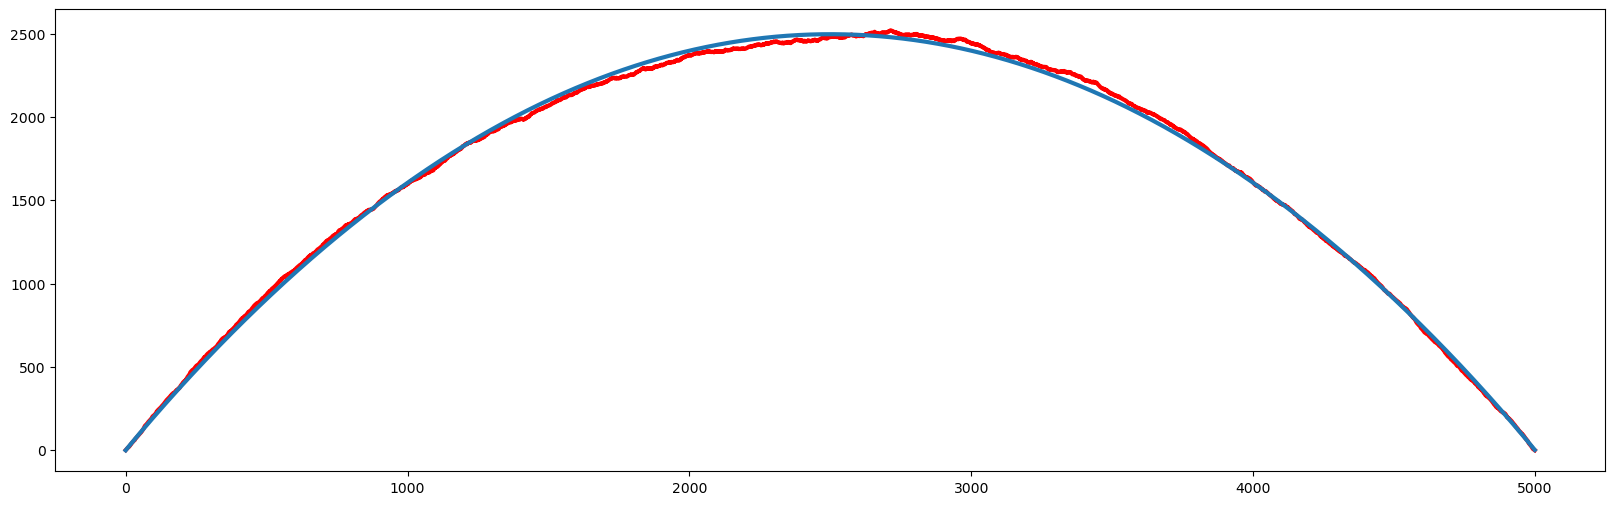

In [4]:
n_iter = 1000
params = np.empty((n_iter, 2))
for i in range(n_iter):    
    n_samples = 1000
    hist_dist = scipy.stats.rv_histogram((AC, np.append(np.arange(k), k)))
    data = hist_dist.rvs(size=n_samples)
    a, b, c, d = scipy.stats.beta.fit(data, floc=0, fscale=k)

    params[i, 0] = a
    params[i, 1] = b

a_mean = np.round(np.mean(params[:, 0]), 2)
b_mean = np.round(np.mean(params[:, 1]), 2)
print(a_mean, b_mean)

ac = scipy.stats.beta.pdf(np.arange(k), a_mean, b_mean, loc=0, scale=k)
slope, _, _, _ = np.linalg.lstsq(ac.reshape(-1,1), AC, rcond=None)

plt.plot(np.arange(k), AC, color='red', lw=3)
plt.plot(np.arange(k), ac*slope, lw=3)

# Generate Idealized 1-Dimensional Arc Curve

This generates a vector of a matrix profile indices that randomly point to some part of the time series ahead of its own position.

In [5]:
k = 5000

mpi = np.zeros(k, dtype=np.int64)
mpi[:-1] = k
for i in range(k-1):
    mpi[i] = np.random.randint(i+1, k)
AC_1D = np.zeros(k, dtype=np.int64)
nnmark = np.zeros(k, dtype=np.int64)

for i in range(k):
    j = mpi[i]
    nnmark[min(i, j)] = nnmark[min(i, j)] + 1
    nnmark[max(i, j)] = nnmark[max(i, j)] - 1

AC_1D = np.cumsum(nnmark)

# Fit a Beta Distribution to the Idealized 1-Dimensional Arc Curve

Average the computed alpha and beta parameters across 1,000 iterations and by drawing 1,000 samples from a distribution that is sampled according to the unnormalized histogram.

alpha = 2.06, beta = 1.66


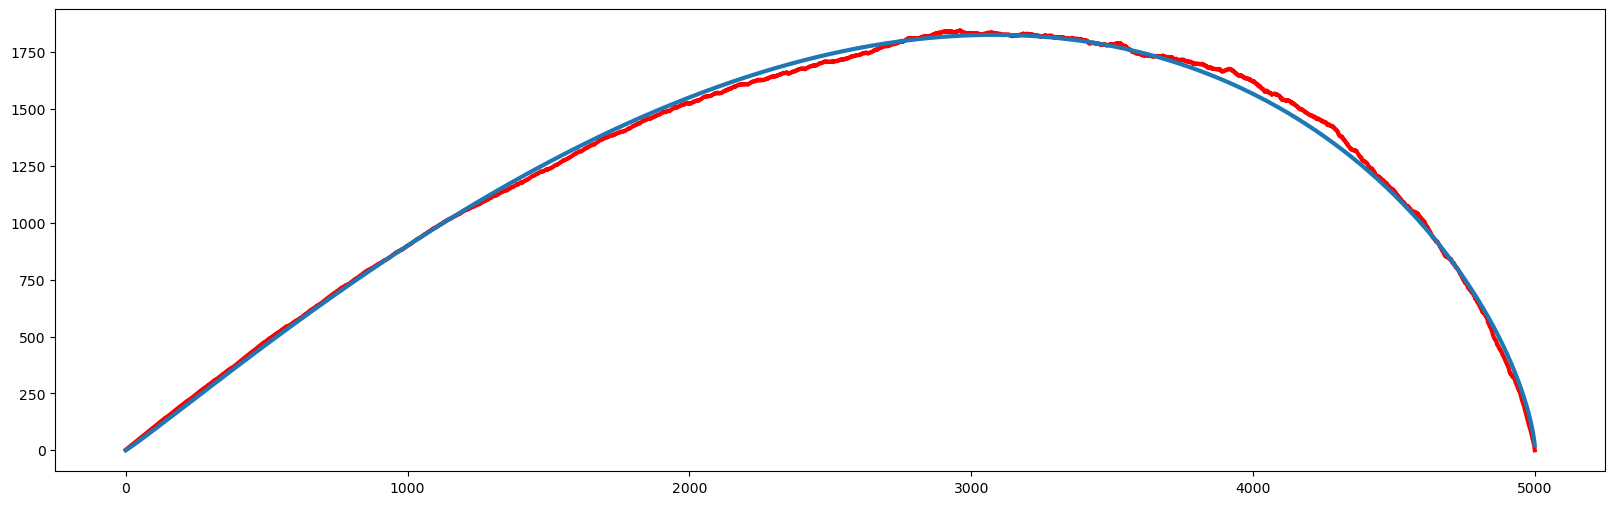

In [6]:
n_iter = 1000
params = np.empty((n_iter, 2))
for i in range(n_iter):    
    n_samples = 1000
    hist_dist = scipy.stats.rv_histogram((AC_1D, np.append(np.arange(k), k)))
    data = hist_dist.rvs(size=n_samples)
    a, b, c, d = scipy.stats.beta.fit(data, floc=0, fscale=k)
    
    params[i, 0] = a
    params[i, 1] = b

a_mean = np.round(np.mean(params[:, 0]), 2)
b_mean = np.round(np.mean(params[:, 1]), 2)
print(f"alpha = {a_mean}, beta = {b_mean}")

ac_1d = scipy.stats.beta.pdf(np.arange(k), a_mean, b_mean, loc=0, scale=k)
slope, _, _, _ = np.linalg.lstsq(ac_1d.reshape(-1,1), AC_1D, rcond=None)    

plt.plot(np.arange(k), AC_1D, color='red', lw=3)
plt.plot(np.arange(k), ac_1d*slope, lw=3)

In [7]:
max(AC_1D)

np.int64(1846)

# Reproduce Michael Yeh's Matlab Example for the 1-Dimensional Arc Curve

This is here for reference only and should not be used. The above approach is much faster for finding the the right alpha and beta values for a beta distribution.

In [8]:
x = [None] * k
for i in range(k):
    x[i] = np.ones(AC_1D[i], dtype=np.int64) * i
x = np.concatenate(x)

In [9]:
a, b, c, d = scipy.stats.beta.fit(x/k)  # This takes a while

In [10]:
print(f"alpha = {a}, beta = {b}")

alpha = 2.0686952775402663, beta = 1.6552807056956045


In [11]:
# This takes a while
y = scipy.stats.beta.rvs(a, b, size=x.shape[0])
y = np.round(y * k).astype(np.int64)

AC_1D_Yeh = np.zeros(k, dtype=np.int64)
for i in range(k):
    AC_1D_Yeh[i] = np.sum(y == i)

In [12]:
ac_1d_yeh = scipy.stats.beta.pdf(np.arange(k), a, b, loc=0, scale=k)
slope, _, _, _ = np.linalg.lstsq(ac_1d_yeh.reshape(-1,1), AC_1D_Yeh, rcond=None)

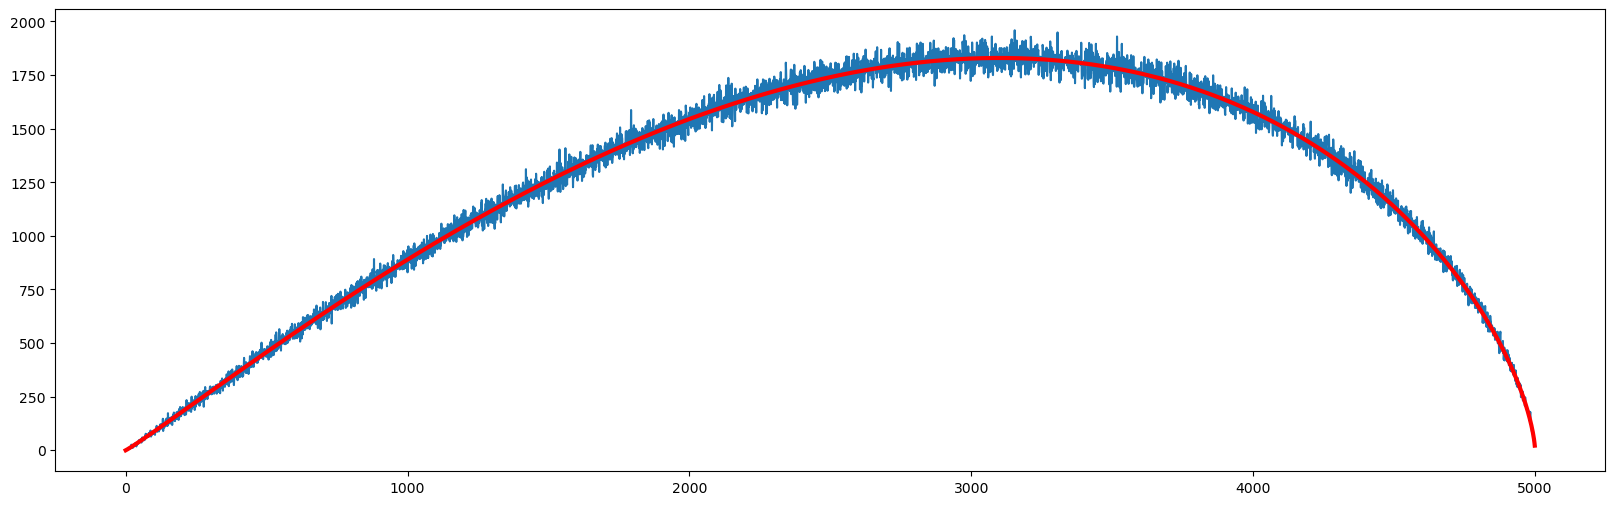

In [13]:
plt.plot(range(k), AC_1D_Yeh)
plt.plot(range(k), ac_1d_yeh*slope, color='red', lw=3)